# Simulador de Datos 
---

In [1]:
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)


def generar_dataset(num_samples=1000, seed=42):
    np.random.seed(seed)
    random.seed(seed)
    
    # Género con sesgo en probabilidades (incluye 'No Binario')
    genero = np.random.choice(['Hombre', 'Mujer', 'No Binario'], 
                              size=num_samples, 
                              p=[0.65, 0.3, 0.05])

    # Nivel Educativo con sesgo según género
    def generar_nivel_educativo(genero):
        if genero == 'Hombre':
            return np.random.choice(['Técnico', 'Universitario', 'Magister', 'Doctorado'],
                                    p=[0.4, 0.45, 0.10, 0.05])
        elif genero == 'Mujer':
            return np.random.choice(['Técnico', 'Universitario', 'Magister', 'Doctorado'],
                                    p=[0.4, 0.5, 0.07, 0.03])
        else:  # No Binario
            return np.random.choice(['Técnico', 'Universitario', 'Magister', 'Doctorado'],
                                    p=[0.35, 0.55, 0.05, 0.05])
    
    nivel_educativo = np.array([generar_nivel_educativo(g) for g in genero])
    
    # Rama Principal (Tecnología)
    ramas_principales = ['Desarrollo', 'Infraestructura', 'Ciberseguridad', 'Soporte', 'Análisis de Datos']
    rama_principal = np.random.choice(ramas_principales, size=num_samples, p=[0.4, 0.2, 0.1, 0.25, 0.05])

    # Edad

    def generar_edad_por_genero(genero, media_edad=35, desviacion_edad=5):
        """
        Genera una edad basada en el género con una distribución normal, pero ajustada por género.
        
        Parameters:
            genero (str): El género del individuo ('Hombre', 'Mujer', 'No Binario').
            media_edad (float): La media de la edad para cada género.
            desviacion_edad (float): La desviación estándar de la edad para cada género.
        
        Returns:
            int: La edad generada.
        """
        if genero == 'Hombre':
            return int(np.clip(np.random.normal(loc=media_edad, scale=desviacion_edad), 18, 65))
        elif genero == 'Mujer':
            return int(np.clip(np.random.normal(loc=media_edad - 3, scale=desviacion_edad), 18, 60))
        else:  # No Binario
            return int(np.clip(np.random.normal(loc=media_edad - 5, scale=desviacion_edad), 18, 65))

    
    # Generar edades para cada género
    edad = np.array([generar_edad_por_genero(g) for g in genero])
           
    
        # Función para generar años de experiencia basada en la edad
    def generar_anns_experiencia(edad):
        """
        Genera los años de experiencia basados en la edad.
        La experiencia aumenta con la edad, con algo de variabilidad.
        """
        # La experiencia es una fracción de la edad con algo de variabilidad
        experiencia_base = int(edad * 0.3)  # Años de experiencia son el 30% de la edad (ajustable)
        # Agregar ruido para hacerlo más realista (puede ser ajustado)
        experiencia_con_ruido = experiencia_base + np.random.randint(-3, 4)  # Rango de variabilidad entre -3 y 3
        return max(experiencia_con_ruido, 0)  # No permitir que la experiencia sea negativa
    
    # Generar años de experiencia basados en la edad
    anns_experiencia_base = np.array([generar_anns_experiencia(e) for e in edad])

    
    # Ajuste de años de experiencia según nivel educativo
    def ajustar_experiencia(exp_base, nivel):
        ajustes = {
            'Técnico': 0,
            'Universitario': 0,
            'Magister': 2,
            'Doctorado': 4
        }
        return exp_base + ajustes[nivel]
    
    anns_experiencia = np.array([
        min(ajustar_experiencia(exp, nivel), edad[i] - 18)
        for i, (exp, nivel) in enumerate(zip(anns_experiencia_base, nivel_educativo))
    ])

    # Años programando (no puede ser mayor que los años de experiencia)
    anns_programando = np.minimum(anns_experiencia, np.random.normal(6, 4, size=num_samples).clip(0, 25).astype(int))
       
    # Tecnologías con las que ha trabajado
    tecnologias_disponibles = ['Python', 'JavaScript', 'Java', 'C++', 'SQL', 'AWS', 'R', 'Docker', 'Kubernetes', 'React', 'Angular', 'Node.js']
    tecnologias_trabajadas = [random.sample(tecnologias_disponibles, random.randint(1, 4)) 
        for _ in range(num_samples)]
    
    # Asignar puntajes aleatorios (de 1 a 10) a cada tecnología trabajada
    puntajes_tecnologia = [
        {tec: random.randint(1, 10) for tec in tech_list} 
        for tech_list in tecnologias_trabajadas
    ]

    def calcular_habilidad_computacional(anns_programando, tecnologias_trabajadas, puntajes_tecnologia, nivel_educativo):
        factor_experiencia = 1.2
        factor_educativo = {
            'Técnico': 0.8,
            'Universitario': 1.0,
            'Magister': 1.1,
            'Doctorado': 1.2
        }
        
        habilidades_computacionales = [
            (sum(puntajes_tecnologia[i].values()) + (anns_programando[i] * factor_experiencia)) * 
            factor_educativo[nivel_educativo[i]]
            for i in range(len(tecnologias_trabajadas))
        ]
        return habilidades_computacionales

    def normalizar_habilidades(habilidades_computacionales):
        habilidades_computacionales = np.array(habilidades_computacionales)
        habilidad_min = habilidades_computacionales.min()
        habilidad_max = habilidades_computacionales.max()
        habilidades_normalizadas = 1 + 9 * (habilidades_computacionales - habilidad_min) / (habilidad_max - habilidad_min)
        habilidades_normalizadas_redondeadas = [math.floor(hab * 10) / 10 for hab in habilidades_normalizadas]
        return habilidades_normalizadas_redondeadas

    # Calcular las habilidades computacionales
    habilidades_computacionales = calcular_habilidad_computacional(
        anns_programando, tecnologias_trabajadas, puntajes_tecnologia, nivel_educativo
    )

    # Normalizar las habilidades
    habilidades_normalizadas = normalizar_habilidades(habilidades_computacionales)

    def calcular_salario(educacion, experiencia, habilidades, genero):
        # Salario base ajustado al mercado chileno (en pesos chilenos)
        salario_base = 410000  # 0.8M CLP
        factor_educativo = {
            'Técnico': 1.2, 
            'Universitario': 1.5, 
            'Magister': 1.8, 
            'Doctorado': 2.2
        }
        base = salario_base * (1 + experiencia * 0.05) * factor_educativo[educacion] * ( 1 + habilidades/10)
        if genero in ['Mujer', 'No Binario']:  # Sesgo salarial Género
            return base * 0.73
        return base
    
    salario_anterior = np.array([calcular_salario(edu, exp, prog, gen) 
                                for edu, exp, prog, gen in zip(nivel_educativo, anns_experiencia, habilidades_computacionales, genero)])
    
    #### Contratación 
    def calcular_factor_mercado(rama):
        """Calcula un factor de demanda según la rama tecnológica"""
        factores_mercado = {
            'Desarrollo': 1.2,        # Alta demanda
            'Infraestructura': 1.1,   # Demanda moderada-alta
            'Ciberseguridad': 1.3,    # Muy alta demanda
            'Soporte': 1.0,           # Demanda moderada
            'Análisis de Datos': 1.25  # Demanda alta
        }
        return factores_mercado.get(rama, 1.0)

    def calcular_factor_tecnologias(tecnologias, puntajes):
        """Calcula un factor basado en las tecnologías y sus puntajes"""
        tecnologias_demandadas = {
            'Python': 1.2,
            'JavaScript': 1.15,
            'AWS': 1.25,
            'Docker': 1.2,
            'Kubernetes': 1.3,
            'React': 1.15,
            'Node.js': 1.1
        }
        
        factor = 1.0
        for tech in tecnologias:
            if tech in tecnologias_demandadas:
                # Considera tanto la presencia de la tecnología como el puntaje
                factor *= 1 + (tecnologias_demandadas[tech] - 1) * (puntajes[tech] / 10)
        
        return min(factor, 2.0)  # Limitar el factor máximo

    def calcular_probabilidad_base(experiencia, habilidades, nivel_educativo):
        """Calcula la probabilidad base de contratación"""
        factor_educativo = {
            'Técnico': 0.6,
            'Universitario': 0.7,
            'Magister': 0.8,
            'Doctorado': 0.8
        }
        
        # Experiencia tiene un efecto logarítmico (rendimientos decrecientes)
        factor_experiencia = np.log1p(experiencia) / 3
        
        # Habilidades tienen un efecto más directo
        factor_habilidades = habilidades / 2
        
        prob_base = (factor_experiencia + factor_habilidades) * factor_educativo[nivel_educativo]
        return prob_base

    def contratacion_sigmoide(x):
        """Función sigmoide que convierte un valor en una probabilidad entre 0 y 1, 
        y luego ajusta a 1 si la probabilidad es mayor o igual a 0.5, y 0 si es menor."""
        probabilidad = 1 / (1 + np.exp(-x))  # Calculamos la sigmoide
        if probabilidad >= 0.85:
            return 1
        else:
            return 0

    def puntaje_contratacion(experiencia, habilidades, genero, nivel_educativo, rama, tecnologias, puntajes):
        """Función principal para calcular la probabilidad de contratación"""
        # Probabilidad base
        ruido = np.random.normal(0, 0.1)

        prob_base = calcular_probabilidad_base(experiencia, habilidades, nivel_educativo) 
        
        # Factores adicionales
        factor_mercado = calcular_factor_mercado(rama)
        factor_tech = calcular_factor_tecnologias(tecnologias, puntajes)
        
        # Factor de género (representando sesgos del mercado)
        factor_genero = 0.75 if genero in ['Mujer', 'No Binario'] else 0.95
        
        # Combinación de factores
        puntaje = prob_base * factor_mercado * factor_tech * factor_genero + ruido
        
        # Normalizar usando sigmoide
        return puntaje

    # Calcular probabilidades de contratación
    probabilidad_empleo = np.array([
        puntaje_contratacion(
            exp, hab, gen, edu, rama, techs, puntajes_tecnologia[i]
        ) for i, (exp, hab, gen, edu, rama, techs) in enumerate(
            zip(anns_experiencia, habilidades_normalizadas, genero, 
                nivel_educativo, rama_principal, tecnologias_trabajadas)
        )
    ])
    
    # Convertir lista de tecnologías a string con separador '|'
    tecnologias_str = ["|".join(techs) for techs in tecnologias_trabajadas]

    contratacion = np.array([contratacion_sigmoide(prob) for prob in probabilidad_empleo])

    puntajes_tecnologia_sum = [sum(puntajes_tecnologia[i].values()) for i in range(len(tecnologias_trabajadas))]
    
    df = pd.DataFrame({
        'Edad': edad,
        'Genero': genero,
        'NivelEducativo': nivel_educativo,
        'RamaPrincipal': rama_principal,
        'AñosExperiencia': anns_experiencia,
        'AñosExperienciaPro': anns_programando,
        'HaTrabajadoCon': tecnologias_str,  # Ahora usa el formato con separador '|'
        'PuntajesTecnologias': puntajes_tecnologia_sum,
        'HabilidadesComputacionales': habilidades_normalizadas,
        'SalarioAnterior': salario_anterior,
        'Puntaje': probabilidad_empleo,
        'Contratacion':  contratacion 
    })
    
    return df


# Revisión de los Datos Simulados
---

In [2]:

# Función para generar análisis básico del dataset
def analizar_dataset(df):
    """
    Genera un análisis básico del dataset de contratación
    """
    print("\n=== Análisis del Dataset de Contratación ===")
    
    # Estadísticas generales
    print("\nEstadísticas de Contratación por Género:")
    print(df.groupby('Genero')['Contratacion'].agg(['mean', 'std', 'count']))
    
    print("\nEstadísticas de Contratación por Nivel Educativo:")
    print(df.groupby('NivelEducativo')['Contratacion'].agg(['mean', 'std', 'count']))
    
    print("\nEstadísticas de Contratación por Rama Principal:")
    print(df.groupby('RamaPrincipal')['Contratacion'].agg(['mean', 'std', 'count']))
    
    # Análisis de brechas salariales
    print("\nBrechas Salariales:")
    print(df.groupby('Genero')['SalarioAnterior'].agg(['mean', 'median']))
    
    # Análisis de habilidades
    print("\nHabilidades Computacionales por Nivel Educativo:")
    print(df.groupby('NivelEducativo')['HabilidadesComputacionales'].agg(['mean', 'std']))

# Ejemplo de uso
if __name__ == "__main__":
    # Generar dataset
    df = generar_dataset(num_samples=1000)
    
    # Analizar resultados
    analizar_dataset(df)
    
    # Guardar dataset
    df.to_csv('simulacion_contratacion_tech_chile_sample.csv', index=False)



=== Análisis del Dataset de Contratación ===

Estadísticas de Contratación por Género:
            mean  std  count
Genero                      
Hombre      0.79 0.41    671
Mujer       0.59 0.49    283
No Binario  0.59 0.50     46

Estadísticas de Contratación por Nivel Educativo:
                mean  std  count
NivelEducativo                  
Doctorado       0.96 0.20     50
Magister        0.94 0.24     86
Técnico         0.55 0.50    380
Universitario   0.79 0.41    484

Estadísticas de Contratación por Rama Principal:
                   mean  std  count
RamaPrincipal                      
Análisis de Datos  0.78 0.42     60
Ciberseguridad     0.79 0.41     95
Desarrollo         0.75 0.43    398
Infraestructura    0.69 0.46    196
Soporte            0.66 0.47    251

Brechas Salariales:
                 mean     median
Genero                          
Hombre     2731358.08 2461230.00
Mujer      1816320.37 1717287.62
No Binario 1819284.12 1565937.60

Habilidades Computacionales p

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,1000.00,33.43,5.35,18.00,30.00,33.00,37.00,54.00
AñosExperiencia,1000.00,9.77,3.01,0.00,8.00,10.00,12.00,18.00
AñosExperienciaPro,1000.00,5.10,3.09,0.00,3.00,5.00,7.00,14.00
PuntajesTecnologias,1000.00,14.27,8.01,1.00,8.00,13.00,20.00,39.00
HabilidadesComputacionales,1000.00,4.48,1.68,1.00,3.20,4.30,5.60,10.00
SalarioAnterior,1000.00,2430447.00,1214714.89,521500.32,1597435.93,2201247.98,2928937.50,9035153.60
Puntaje,1000.00,2.49,1.13,0.55,1.67,2.27,3.09,8.01
Contratacion,1000.00,0.72,0.45,0.00,0.00,1.00,1.00,1.00


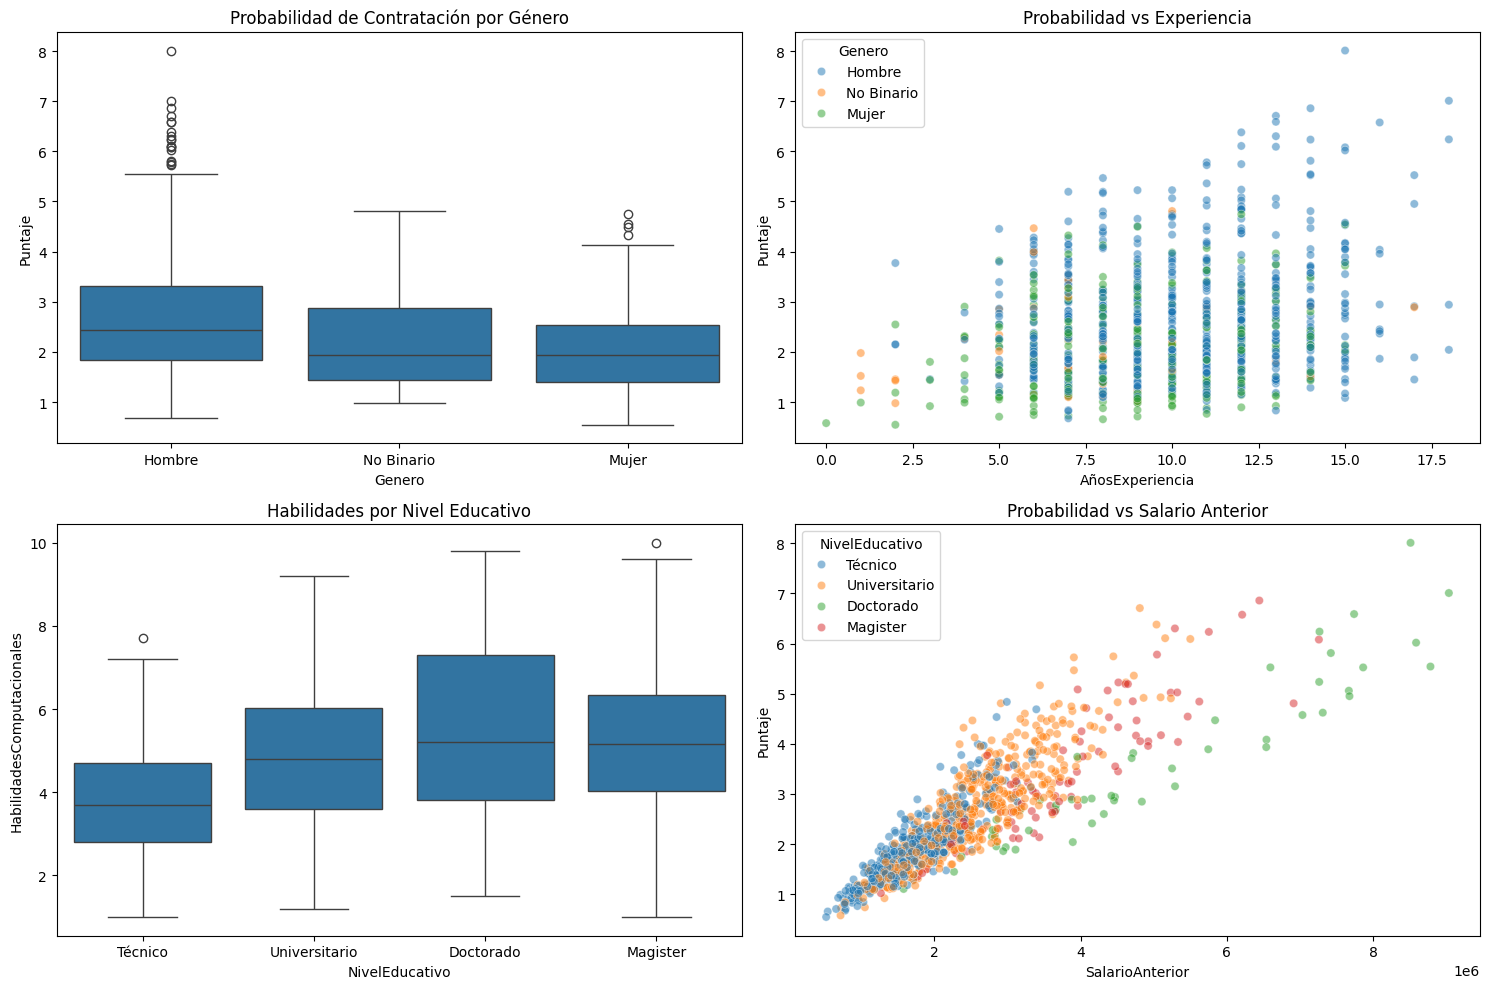

In [4]:
# Visualizaciones
plt.figure(figsize=(15, 10))

# 1. Distribución de probabilidades de contratación por género
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Genero', y='Puntaje')
plt.title('Probabilidad de Contratación por Género')

# 2. Relación entre experiencia y probabilidad de contratación
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='AñosExperiencia', y='Puntaje', hue='Genero', alpha=0.5)
plt.title('Probabilidad vs Experiencia')

# 3. Distribución de habilidades por nivel educativo
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='NivelEducativo', y='HabilidadesComputacionales')
plt.title('Habilidades por Nivel Educativo')

# 4. Salario anterior vs Probabilidad de contratación
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='SalarioAnterior', y='Puntaje', hue='NivelEducativo', alpha=0.5)
plt.title('Probabilidad vs Salario Anterior')

plt.tight_layout()
plt.show()


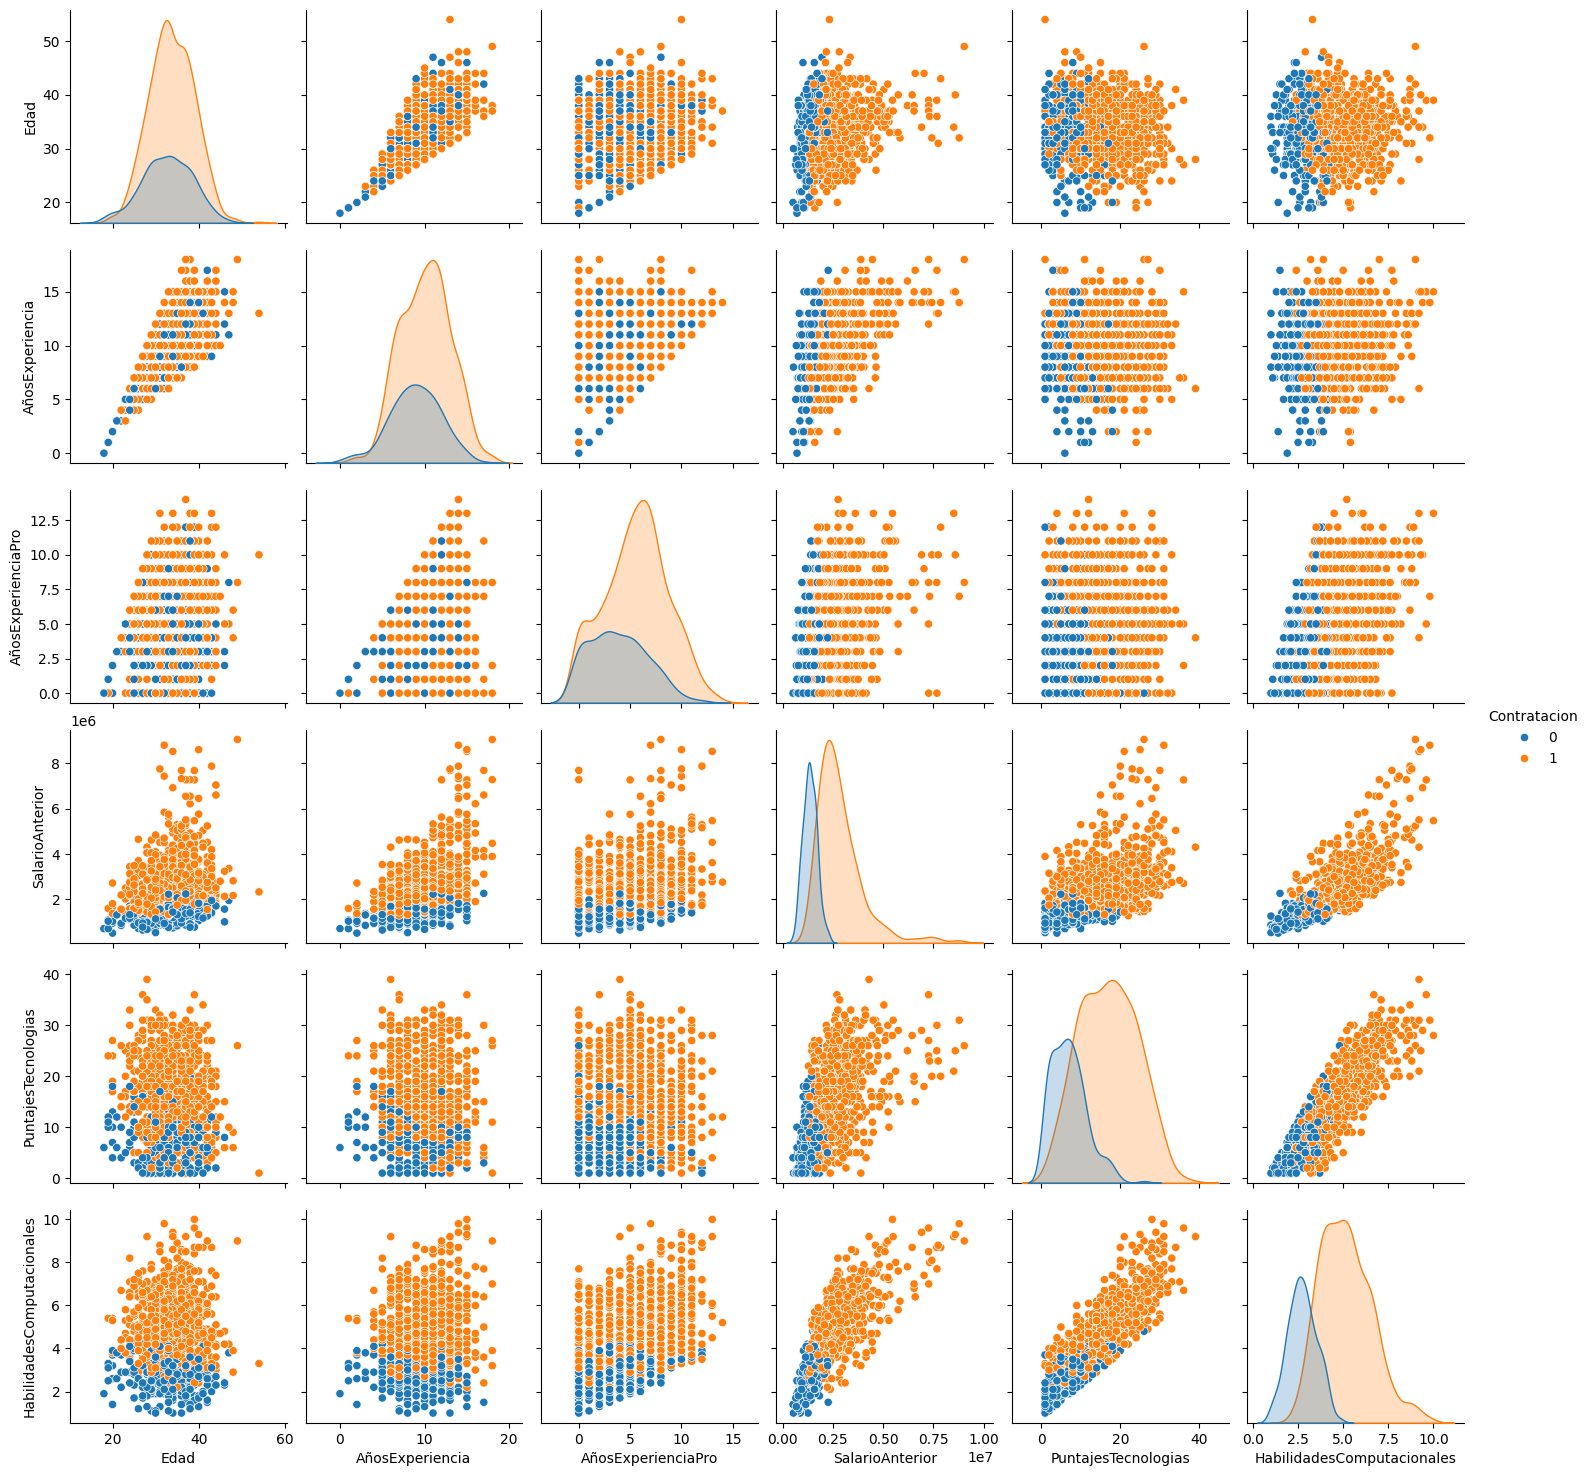

In [5]:
# Selecciona las variables de interés
df_interes = df[['Edad', 'AñosExperiencia','AñosExperienciaPro', 'SalarioAnterior', 'PuntajesTecnologias','HabilidadesComputacionales','Contratacion']]


# Crear el pairplot con 'Contratacion' como hue
sns.pairplot(df_interes, hue='Contratacion')
plt.show()


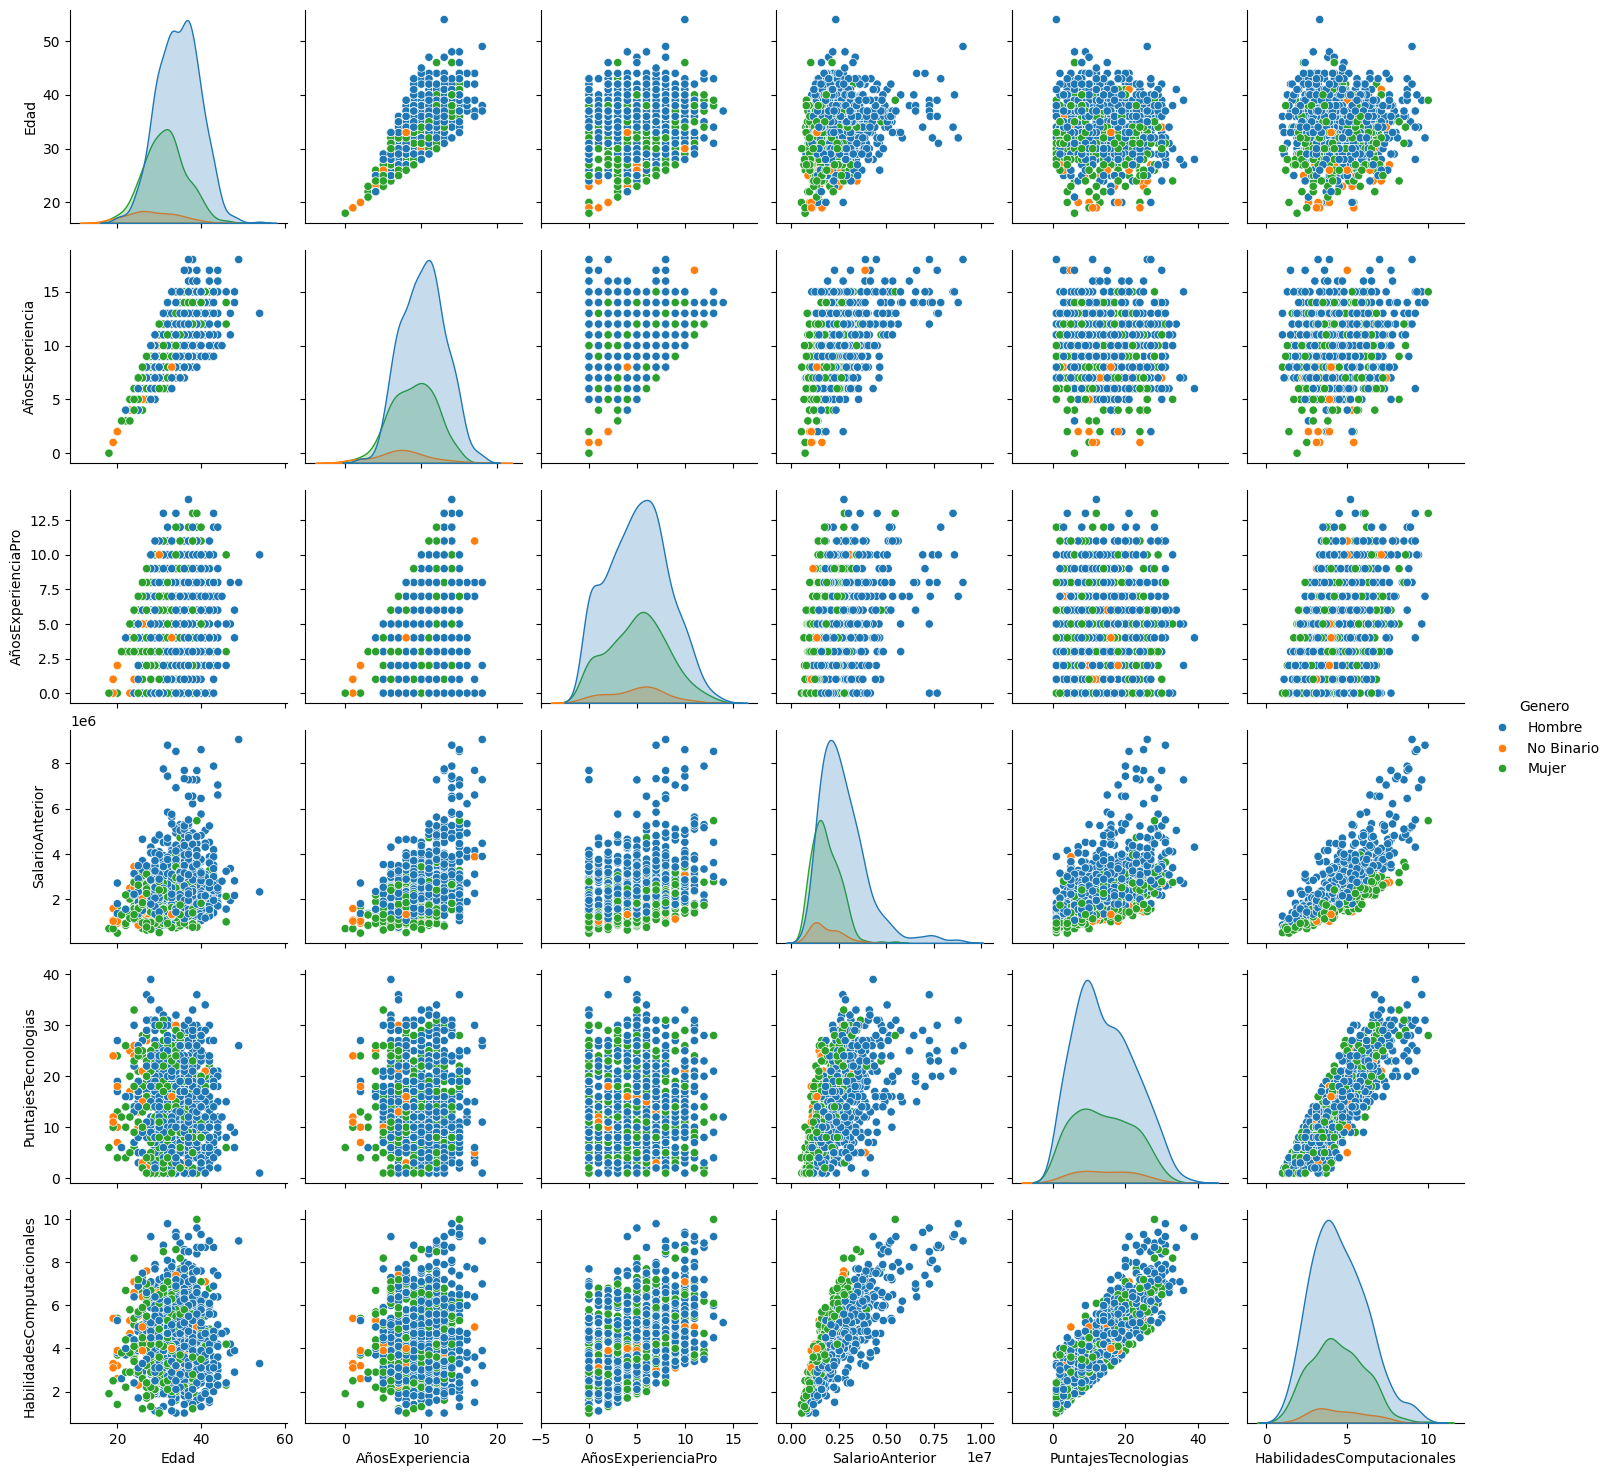

In [6]:
# Selecciona las variables de interés
df_interes = df[['Edad', 'AñosExperiencia','AñosExperienciaPro', 'SalarioAnterior', 'PuntajesTecnologias','HabilidadesComputacionales','Genero']]


# Crear el pairplot con 'Contratacion' como hue
sns.pairplot(df_interes, hue='Genero')
plt.show()


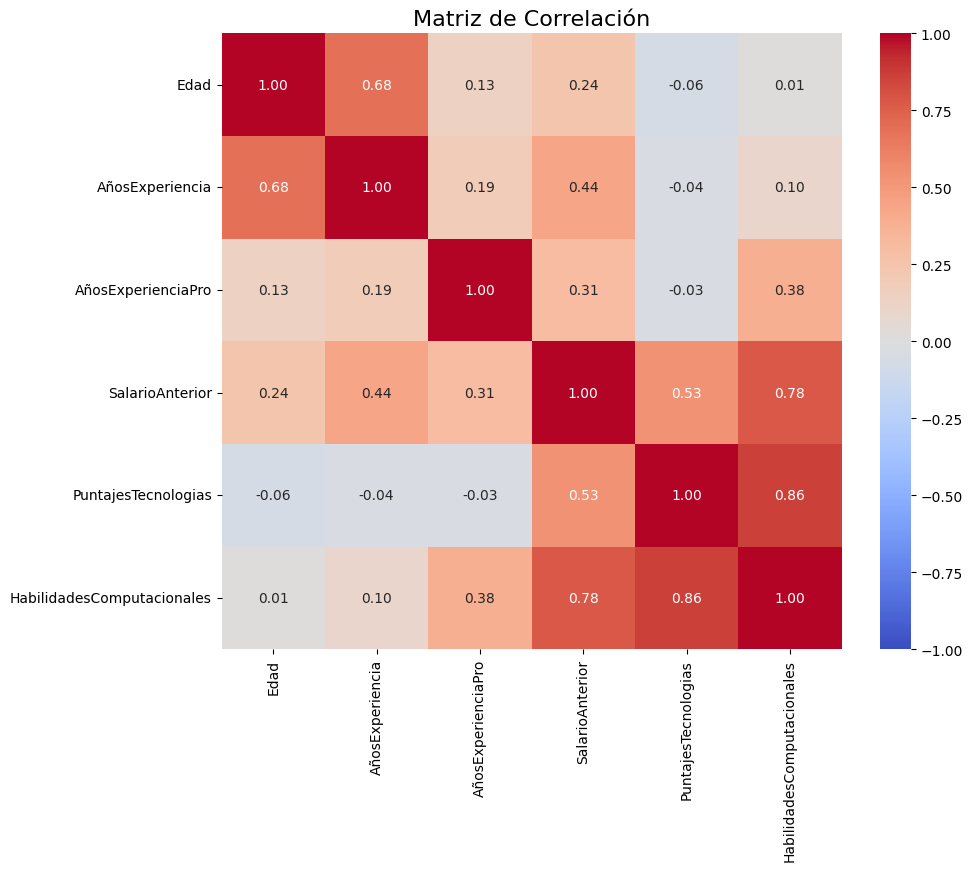

In [7]:
# Calcular la matriz de correlación
correlation_matrix = df[['Edad', 'AñosExperiencia','AñosExperienciaPro', 'SalarioAnterior', 'PuntajesTecnologias','HabilidadesComputacionales']].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Título y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.show()
